### Kaggle Link

https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
train_df = pd.read_csv('../Data/Kaggle/toxic_train.csv')
test_df  = pd.read_csv('../Data/Kaggle/toxic_test.csv')

In [3]:
train_df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


### Pre-Processing

In [4]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.stem import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer

In [5]:
stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')
lemma = WordNetLemmatizer()

In [6]:
from autocorrect import spell

In [7]:
for df in [train_df, test_df]:
    df['comment_text'] = df['comment_text'].apply(lambda x: word_tokenize(str(x)))
    df['comment_text'] = df['comment_text'].apply(lambda x: [lemma.lemmatize(word) for word in x])
    df['comment_text'] = df['comment_text'].apply(lambda x: ' '.join(x))

### Feature Engineering 

In [8]:
import re

for df in [train_df, test_df]:
    df['len'] = df['comment_text'].apply(lambda x: len(str(x)))
    df['num_numbers'] = df['comment_text'].apply(lambda x: len(re.sub(r'\D+', '', str(x))))
    df['num_non-word'] = df['comment_text'].apply(lambda x: len(re.sub(r'\w+', '', str(x))))    
    df['num_capitals'] = df['comment_text'].apply(lambda x: sum(1 for c in x if c.isupper()))
    df['caps_vs_len'] = df.apply(lambda row: 0 if row['len'] == 0 else float(row['num_capitals'])/float(row['len']),  axis=1)
    df['num_exclamation_marks'] = df['comment_text'].apply(lambda x: x.count('!'))
    df['num_question_marks'] = df['comment_text'].apply(lambda x: x.count('?'))
    df['num_punctuation'] = df['comment_text'].apply(lambda x: sum(x.count(w) for w in '.,;:'))
    df['num_symbols'] = df['comment_text'].apply(lambda x: sum(x.count(w) for w in '*&$%#'))
    df['num_words'] = df['comment_text'].apply(lambda x: len(x.split()))
    df['num_unique_words'] = df['comment_text'].apply(lambda x: len(set(w for w in x.split())))
    df['words_vs_unique'] = df['num_unique_words'] / df['num_words']

In [9]:
new_features = ['len', 'num_numbers', 'num_non-word', 'num_capitals', 'caps_vs_len', 
                'num_exclamation_marks', 'num_question_marks', 'num_punctuation', 
                'num_symbols', 'num_words', 'num_unique_words', 'words_vs_unique']

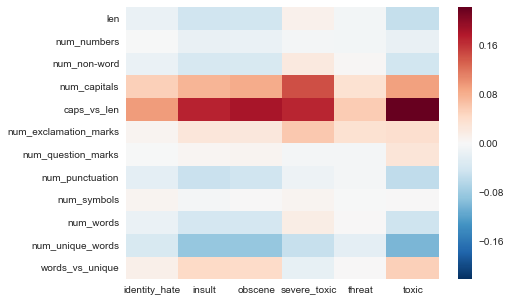

In [10]:
plt.figure(figsize=(7,5))
columns = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

rows = [{c:train_df[f].corr(train_df[c]) for c in columns} for f in new_features]
df_correlations = pd.DataFrame(rows, index=new_features)

sns.heatmap(df_correlations)

In [11]:
train_df[new_features] = train_df[new_features].fillna(0)
test_df[new_features] = test_df[new_features].fillna(0)

In [12]:
columns = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_df.loc[:, new_features] = scaler.fit_transform(train_df[new_features])
test_df.loc[:, new_features]  = scaler.transform(test_df[new_features])

In [14]:
train_df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,len,num_numbers,num_non-word,num_capitals,caps_vs_len,num_exclamation_marks,num_question_marks,num_punctuation,num_symbols,num_words,num_unique_words,words_vs_unique
0,0000997932d777bf,Explanation Why the edits made under my userna...,0,0,0,0,0,0,-0.220846,0.335426,-0.258955,-0.001654,0.144424,-0.025546,0.346388,-0.154587,-0.122056,-0.259355,-0.106586,0.745514
1,000103f0d9cfb60f,D'aww ! He match this background colour I 'm s...,0,0,0,0,0,0,-0.469385,0.394302,-0.389186,-0.094891,0.189114,0.013065,-0.282584,-0.232894,-0.122056,-0.441521,-0.517732,0.449312
2,000113f07ec002fd,"Hey man , I 'm really not trying to edit war ....",0,0,0,0,0,0,-0.270554,-0.194455,-0.291513,-0.136330,-0.370814,-0.025546,-0.282584,-0.311200,-0.122056,-0.267636,-0.126165,0.731857
3,0001b41b1c6bb37e,`` More I ca n't make any real suggestion on i...,0,0,0,0,0,0,0.377306,-0.194455,0.353131,-0.063812,-0.362786,-0.025546,-0.282584,-0.154587,0.659476,0.394784,0.794019,-0.506134
4,0001d958c54c6e35,"You , sir , are my hero . Any chance you remem...",0,0,0,0,0,0,-0.547261,-0.194455,-0.493371,-0.157049,-0.248368,-0.025546,0.346388,-0.389507,-0.122056,-0.516043,-0.635202,1.044143


In [15]:
test_df.head()

,id,comment_text,len,num_numbers,num_non-word,num_capitals,caps_vs_len,num_exclamation_marks,num_question_marks,num_punctuation,num_symbols,num_words,num_unique_words,words_vs_unique
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you 'l...,-0.055153,-0.194455,-0.037562,-0.136330,-0.436202,-0.025546,-0.282584,0.236945,-0.122056,0.005612,0.324138,0.211380
1,0000247867823ef7,"== From RfC == The title is fine a it is , IMO .",-0.587027,-0.194455,-0.512906,-0.105251,1.060842,-0.025546,-0.282584,-0.467814,-0.122056,-0.549164,-0.733094,0.483303
2,00013b17ad220c46,`` == Sources == * Zawe Ashton on Lapland — / ``,-0.587027,-0.194455,-0.493371,-0.136330,0.367731,-0.025546,-0.282584,-0.624427,0.659476,-0.565724,-0.772251,0.330346
3,00017563c3f7919a,": If you have a look back at the source , the ...",-0.318605,-0.194455,-0.317559,-0.136330,-0.345183,-0.025546,-0.282584,-0.232894,-0.122056,-0.300757,-0.341527,-0.351005
4,00017695ad8997eb,I do n't anonymously edit article at all .,-0.596969,-0.194455,-0.571510,-0.167409,-0.292375,-0.025546,-0.282584,-0.546120,-0.122056,-0.590565,-0.791829,1.401041


### Modeling

In [16]:
features = train_df.columns.difference(columns)
train_df["comment_text"].fillna(" ", inplace=True)
test_df["comment_text"].fillna(" ", inplace=True)

x_train = train_df[features].drop('id', axis=1)
x_test  = test_df[features].drop('id', axis=1)
y_train = train_df[columns]

In [17]:
x_train.head()

,caps_vs_len,comment_text,len,num_capitals,num_exclamation_marks,num_non-word,num_numbers,num_punctuation,num_question_marks,num_symbols,num_unique_words,num_words,words_vs_unique
0,0.144424,Explanation Why the edits made under my userna...,-0.220846,-0.001654,-0.025546,-0.258955,0.335426,-0.154587,0.346388,-0.122056,-0.106586,-0.259355,0.745514
1,0.189114,D'aww ! He match this background colour I 'm s...,-0.469385,-0.094891,0.013065,-0.389186,0.394302,-0.232894,-0.282584,-0.122056,-0.517732,-0.441521,0.449312
2,-0.370814,"Hey man , I 'm really not trying to edit war ....",-0.270554,-0.136330,-0.025546,-0.291513,-0.194455,-0.311200,-0.282584,-0.122056,-0.126165,-0.267636,0.731857
3,-0.362786,`` More I ca n't make any real suggestion on i...,0.377306,-0.063812,-0.025546,0.353131,-0.194455,-0.154587,-0.282584,0.659476,0.794019,0.394784,-0.506134
4,-0.248368,"You , sir , are my hero . Any chance you remem...",-0.547261,-0.157049,-0.025546,-0.493371,-0.194455,-0.389507,0.346388,-0.122056,-0.635202,-0.516043,1.044143


In [18]:
y_train.head()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


In [19]:
selected_features = ['caps_vs_len', 
                     'num_exclamation_marks', 
                     'num_punctuation', 
                     'num_unique_words']

#### Tf-Idf

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
vect_word = TfidfVectorizer(lowercase=True, analyzer='word', stop_words= 'english', ngram_range=(1,3), max_features=80000)
vect_char = TfidfVectorizer(lowercase=True, analyzer='char', stop_words= 'english', ngram_range=(1,3), max_features=80000)

X_train_vectorized_word = vect_word.fit_transform(x_train['comment_text'])
X_train_vectorized_char = vect_char.fit_transform(x_train['comment_text'])

X_test_vectorized_word = vect_word.transform(x_test['comment_text'])
X_test_vectorized_char = vect_char.transform(x_test['comment_text'])

In [22]:
vect_word = TfidfVectorizer(lowercase=True, analyzer='word', token_pattern=r'\w{1,}', strip_accents='unicode',
                            ngram_range=(1, 1), sublinear_tf=True, max_features=20000)
vect_char = TfidfVectorizer(lowercase=True, analyzer='char', strip_accents='unicode',
                            ngram_range=(1, 1), sublinear_tf=True, max_features=30000)

X_train_vectorized_word = vect_word.fit_transform(x_train['comment_text'])
X_train_vectorized_char = vect_char.fit_transform(x_train['comment_text'])

X_test_vectorized_word = vect_word.transform(x_test['comment_text'])
X_test_vectorized_char = vect_char.transform(x_test['comment_text'])

In [23]:
print('Vocabulary len:', len(vect_word.get_feature_names()))
print('Longest word:', len(max(vect_word.vocabulary_, key=len)))

Vocabulary len: 20000
Longest word: 173


In [24]:
print('Vocabulary len:', len(vect_char.get_feature_names()))
print('Longest word:', len(max(vect_char.vocabulary_, key=len)))

Vocabulary len: 1696
Longest word: 1


In [25]:
from scipy import sparse

In [26]:
X_train_vectorized = sparse.hstack([X_train_vectorized_word, X_train_vectorized_char])
X_test_vectorized  = sparse.hstack([X_test_vectorized_word, X_test_vectorized_char])

In [27]:
X_train_vectorized = sparse.hstack([X_train_vectorized, x_train[selected_features]])
X_test_vectorized  = sparse.hstack([X_test_vectorized, x_test[selected_features]])

In [28]:
X_train_vectorized.shape

(159571, 21700)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [30]:
cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [31]:
y_pred = np.zeros((test_df.shape[0], len(cols)))

roc_auc = []
for i, j in enumerate(cols):
    model = LogisticRegression(C=4)
    model.fit(X_train_vectorized, y_train[j])
    y_pred[:,i] = model.predict_proba(X_test_vectorized)[:,1]
    y_check = model.predict_proba(X_train_vectorized)[:,1]
    roc_auc.append(roc_auc_score(y_train[j], y_check))
    
np.mean(roc_auc)

0.9952396612159089

In [32]:
y_df = pd.DataFrame(y_pred, columns=cols)
submission = pd.concat([test_df['id'], y_df], axis=1)
submission.to_csv('tfidf-logistic+features.csv', index=False)

Score: 0.9745

#### Deep Learning

In [33]:
from keras.models import Model, Sequential, load_model
from keras.layers import Dense, Flatten, Embedding, Input, Activation, Dropout
from keras.layers import GRU, Bidirectional, Conv1D
from keras.layers import GlobalMaxPooling1D, SpatialDropout1D, GlobalAveragePooling1D, concatenate
from keras.preprocessing import text, sequence
from keras.callbacks import EarlyStopping, Callback
from keras.layers.normalization import BatchNormalization
import keras.backend as K

C:\Users\paula.ceccon.ribeiro\AppData\Local\Continuum\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [34]:
from IPython.display import clear_output

class PlotLosses(Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        clear_output(wait=True)
        plt.figure(figsize=(10, 5))
        plt.plot(self.x, self.losses, label='loss')
        plt.plot(self.x, self.val_losses, label='val_loss')
        plt.legend()
        plt.show();
        
plot_losses = PlotLosses()

In [35]:
x_train['comment_text'].str.len().mean()

402.2861798196414

In [36]:
x_test['comment_text'].str.len().mean()

370.91567861899665

In [37]:
max_features = 100000
maxlen = 300

In [38]:
tokenizer = text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(x_train['comment_text']))

X_train = tokenizer.texts_to_sequences(x_train['comment_text'])
X_test  = tokenizer.texts_to_sequences(x_test['comment_text'])
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test  = sequence.pad_sequences(X_test,  maxlen=maxlen)

Model based on:
https://github.com/PavelOstyakov/toxic/blob/master/toxic/model.py

In [39]:
def get_keras_data(dataset, df_features):
    
    X = {
        'comment_input'  : dataset,
        'features_input' : df_features[selected_features]
    }
    
    return X

X_train_ = get_keras_data(X_train, x_train)
X_test_  = get_keras_data(X_test, x_test)

In [40]:
early_stopping = EarlyStopping(monitor='val_loss', patience=2)
batch_size = 128
epochs = 20

##### With Features

In [41]:
def get_model():
    comment_input  = Input(shape=(maxlen,), name='comment_input')
    features_input = Input(shape=[X_train_['features_input'].shape[1]], name='features_input')
    
    embedded = Embedding(max_features, 200)(comment_input)
    
    x = Bidirectional(GRU(300, dropout=0.3, recurrent_dropout=0.3, return_sequences=True))(embedded)
    x = SpatialDropout1D(0.25)(x)
    x = Conv1D(64, kernel_size = 3, padding = "valid", kernel_initializer = "glorot_uniform")(x)
    max_pooled = GlobalMaxPooling1D()(x)
    avg_pooled = GlobalAveragePooling1D()(x)
    
    main_layer = concatenate([
        max_pooled,
        avg_pooled,
        features_input
    ])
    
#     embedded = SpatialDropout1D(0.25)(embedded)
#     max_embedding = GlobalMaxPool1D()(embedded)
#     max_embedding = BatchNormalization()(max_embedding)
    
#     main_layer = concatenate([
#         max_embedding,
#         features_input
#     ])

    # normalized dense layer followed by dropout
    main_layer = BatchNormalization()(main_layer)
    main_layer = Dense(64)(main_layer)
    main_layer = Dropout(0.5)(main_layer)

    output_layer = Dense(6, activation='sigmoid')(main_layer)

    model = Model([comment_input, features_input], outputs=output_layer)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

In [42]:
model = get_model()
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
comment_input (InputLayer)      (None, 300)          0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 300, 200)     20000000    comment_input[0][0]              
__________________________________________________________________________________________________
bidirectional_1 (Bidirectional) (None, 300, 600)     901800      embedding_1[0][0]                
__________________________________________________________________________________________________
spatial_dropout1d_1 (SpatialDro (None, 300, 600)     0           bidirectional_1[0][0]            
__________________________________________________________________________________________________
conv1d_1 (

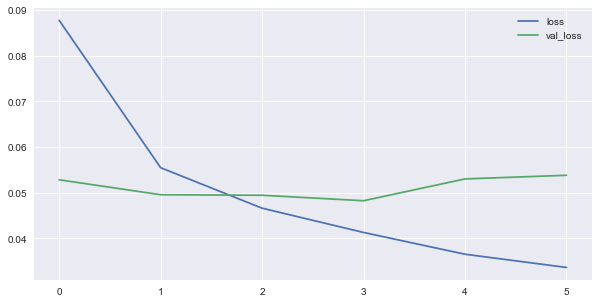

In [43]:
model.fit(X_train_, y_train.values, epochs=epochs, verbose=2, validation_split=0.3, callbacks=[plot_losses, early_stopping])

In [44]:
y_pred = model.predict(X_test_)

In [45]:
y_df = pd.DataFrame(y_pred, columns=columns)
submission = pd.concat([test_df['id'], y_df], axis=1)
submission.to_csv('simple_dnn+features.csv', index=False)

Score: 0.9751

##### Without Features

In [48]:
def get_model():
    comment_input  = Input(shape=(maxlen,), name='comment_input')
    
    embedded = Embedding(max_features, 200)(comment_input)
    
    x = Bidirectional(GRU(300, dropout=0.3, recurrent_dropout=0.3, return_sequences=True))(embedded)
    x = SpatialDropout1D(0.25)(x)
    x = Conv1D(64, kernel_size = 3, padding = "valid", kernel_initializer = "glorot_uniform")(x)
    max_pooled = GlobalMaxPooling1D()(x)
    avg_pooled = GlobalAveragePooling1D()(x)
    
    main_layer = concatenate([
        max_pooled,
        avg_pooled
    ])

    # normalized dense layer followed by dropout
    main_layer = BatchNormalization()(main_layer)
    main_layer = Dense(64)(main_layer)
    main_layer = Dropout(0.5)(main_layer)

    output_layer = Dense(6, activation='sigmoid')(main_layer)

    model = Model([comment_input], outputs=output_layer)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

In [49]:
model = get_model()
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
comment_input (InputLayer)      (None, 300)          0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 300, 200)     20000000    comment_input[0][0]              
__________________________________________________________________________________________________
bidirectional_3 (Bidirectional) (None, 300, 600)     901800      embedding_3[0][0]                
__________________________________________________________________________________________________
spatial_dropout1d_3 (SpatialDro (None, 300, 600)     0           bidirectional_3[0][0]            
__________________________________________________________________________________________________
conv1d_3 (

In [50]:
exp_decay = lambda init, fin, steps: (init/fin)**(1/(steps-1)) - 1
steps = int(len(X_train_)/batch_size) * epochs
lr_init, lr_fin = 0.001, 0.0005
lr_decay = exp_decay(lr_init, lr_fin, steps)
K.set_value(model.optimizer.lr, lr_init)
K.set_value(model.optimizer.decay, lr_decay)

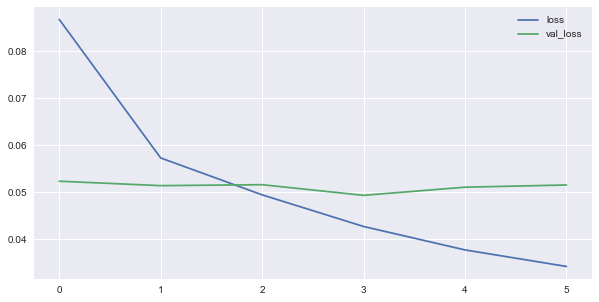

In [51]:
model.fit(X_train_, y_train.values, epochs=epochs, verbose=2, validation_split=0.3, callbacks=[plot_losses, early_stopping])

In [52]:
y_pred = model.predict(X_test_)

In [53]:
y_df = pd.DataFrame(y_pred, columns=columns)
submission = pd.concat([test_df['id'], y_df], axis=1)
submission.to_csv('simple_dnn.csv', index=False)

Score: 0.9748